##Capstone Project on Airbnb-Hosain Ahmed-ID 301209637##

In [1]:
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
%matplotlib inline

In [2]:
##Importing the Airbnb Dataset
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [3]:
##Irrevalent Variables('id','name','host_id','host_name') and Redundant Variable ('reviews_per_month') is dropped
airbnb.drop(['id','name','host_id','host_name','reviews_per_month'],axis=1,inplace = True)

**Data Preparation**

In [4]:
##Converting numeric variables into categorical variables##
airbnb['calculated_host_listings_count_group'] = 'Others'
airbnb['calculated_host_listings_count_group'][airbnb['calculated_host_listings_count'] == 1] = 'one listing'
airbnb['calculated_host_listings_count_group'][airbnb['calculated_host_listings_count'] == 2] = 'two listings'
airbnb['calculated_host_listings_count_group'][airbnb['calculated_host_listings_count'] > 2] = 'more than two listings'

airbnb['minimum_nights_group'] = 'Others'
airbnb['minimum_nights_group'][airbnb['minimum_nights'] == 1] = 'one night'
airbnb['minimum_nights_group'][airbnb['minimum_nights'] == 2] = 'two nights'
airbnb['minimum_nights_group'][airbnb['minimum_nights'] == 3] = 'three nights'
airbnb['minimum_nights_group'][airbnb['minimum_nights'] == 4] = 'four nights'
airbnb['minimum_nights_group'][airbnb['minimum_nights'] > 4] = 'five nights or more'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

##Data Visualization##

**Plotting 'latitude' & 'longitude' to show the most demanding areas in the map**

In [ ]:
import plotly.express as px

lat = np.mean(airbnb['latitude'])
lon = np.mean(airbnb['longitude'])


fig = px.density_mapbox(airbnb, lat='latitude', lon='longitude', z='price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10,
                        mapbox_style="carto-positron")
fig.show()

**Note: The above plot showing that most property offerings are locatede in Manhattan, on the south side of the Central Park, and around Willamsburg Bridge in Brooklyn.**

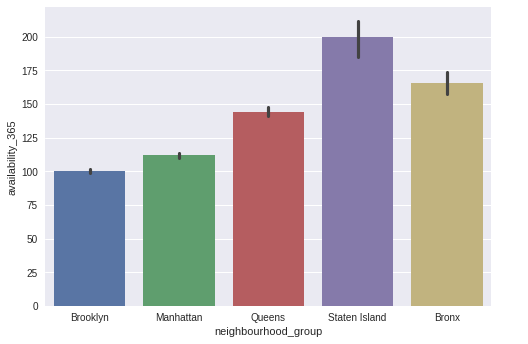

In [ ]:
##Finding demand variability in terms of neighbourhood_group##
sns.barplot(x="neighbourhood_group", y="availability_365",data=airbnb)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

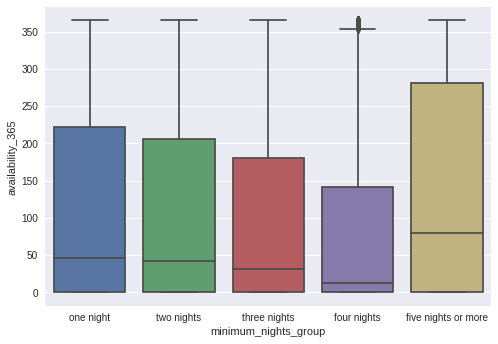

In [ ]:
##Finding demand variability in terms of different length of stay at the property##
sns.boxplot(x="minimum_nights_group", y="availability_365",data=airbnb,
order = ['one night','two nights','three nights','four nights','five nights or more'])

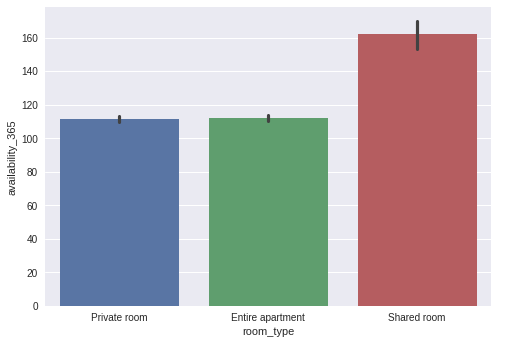

In [ ]:
##Finding demand variability in terms of room_type##
sns.barplot(x="room_type", y="availability_365",data=airbnb)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Note:** 

**Plot-1: Brooklyn and Manhattan are the most demanding location and entire apartment is the most demanding property type.**

**Plot-2: Most frequent length of stay is for four nights**

**Using pairplot to visualize the correlation of all numeric variables. It is  found that, there's no strong linear correlation between individual variables except.**

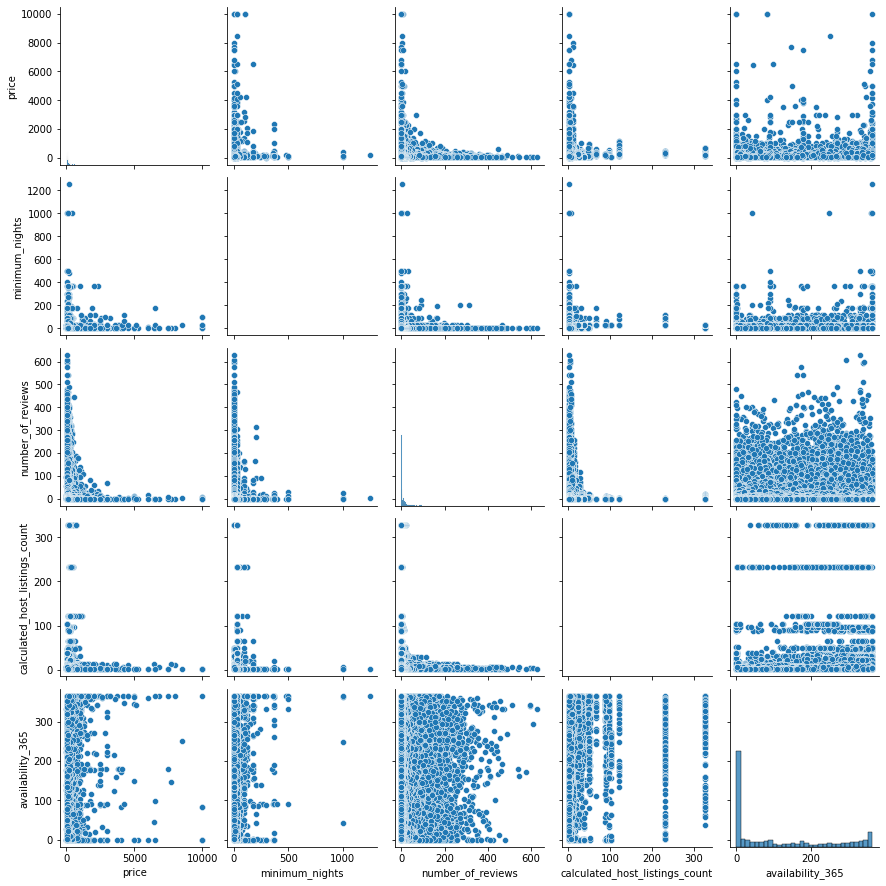

In [ ]:
sns.pairplot(airbnb.drop(['latitude','longitude'],axis=1))

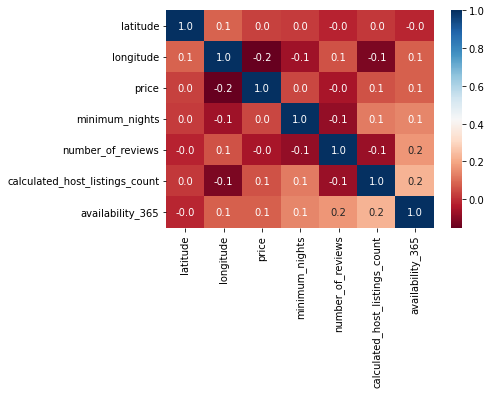

In [ ]:
## using Heatmap to show the co-relation among individual variables##
corr = airbnb.corr()
sns.heatmap(corr, annot=True,fmt='.1f', cmap='RdBu')

##Random Forest Regressor##

In [5]:
##Removing variables not useful for modeling##
airbnb.drop(['latitude','longitude'],axis=1,inplace = True)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from wordcloud import WordCloud

import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

!pip install dmba
from dmba import classificationSummary

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.6 MB/s 
no display found. Using non-interactive Agg backend


In [7]:
##Creating dummies for all the categorical variables##
dummies =['neighbourhood_group','room_type','calculated_host_listings_count_group','minimum_nights_group']
airbnb_dummies =pd.get_dummies(airbnb[dummies],prefix=dummies)

In [8]:
##Adding dummies with the original dataset##
airbnb_model = pd.concat([airbnb,airbnb_dummies],axis=1)

In [9]:
##Removing duplicate variables##
airbnb_model.drop(['last_review','neighbourhood','neighbourhood_group','room_type',
                   'minimum_nights_group','calculated_host_listings_count_group'],axis=1,inplace = True)
airbnb_model.head()

price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0               365                          0                             1   
1               355                          0                             0   
2               365                          0                             0   
3               194                          0                             1   
4                 0                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  ...  room_type_Private room  \
0                                  0  ...                       1   
1                                  0  ...                       0   
2                                  0  ...                       1   
3                                  0  ...                       0   
4                                  0  ...                       0   

   room_type_Shared room  \
0                      0   
1                      0   
2                      0   
3                      0   
4                      0   

   calculated_host_listings_count_group_more than two listings  \
0                                                  1             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   calculated_host_listings_count_group_one listing  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 1   

   calculated_host_listings_count_group_two listings  \
0                                                  0   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  0   

   minimum_nights_group_five nights or more  minimum_nights_group_four nights  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         1                                 0   

   minimum_nights_group_one night  minimum_nights_group_three nights  \
0                               1                                  0   
1                               1                                  0   
2                               0                                  1   
3                               1                                  0   
4                               0                                  0   

   minimum_nights_group_two nights  
0                                0  
1                  

In [10]:
# split train and validation dataset
x = airbnb_model.drop(['availability_365'], axis=1)
y = airbnb_model['availability_365'].astype(float)

train_x, valid_x, train_y, valid_y = train_test_split(x,y , test_size=0.7, random_state=1)

In [11]:
##Fitting the Random Forest Regressor##
rf_regressor = RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [12]:
##Regressor score for training data#
rf_regressor.score(train_x,train_y)

0.8514027638928328

In [13]:
##Regressor score validation data#
rf_regressor.score(valid_x,valid_y)

0.22218657726040325

In [14]:
##RMSE score for training data#
trainpred_y = rf_regressor.predict(train_x)
print('Root Mean Squared Error(train):', np.sqrt(metrics.mean_squared_error(train_y, trainpred_y)))

Root Mean Squared Error(train): 50.427914003848905


In [15]:
##RMSE score for validation data#
validpred_y = rf_regressor.predict(valid_x)
print('Root Mean Squared Error(valid):', np.sqrt(metrics.mean_squared_error(valid_y, validpred_y)))

Root Mean Squared Error(valid): 116.37703341609594


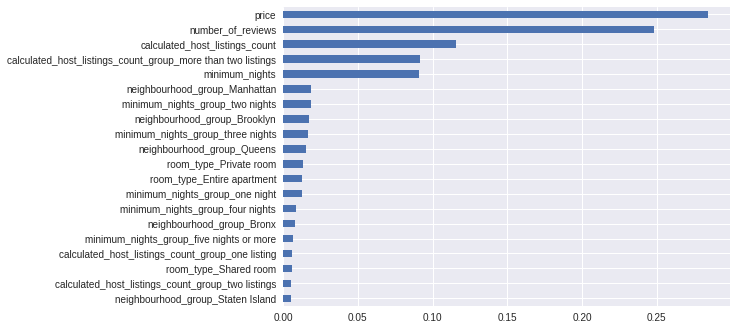

In [ ]:
##Finding the most important feature for property demand##
feature_importance = pd.Series(rf_regressor.feature_importances_,index=x.columns)
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh')

30  trees
0.8426152781362072

50  trees
0.8476224290202315

100  trees
0.8513524763994966

200  trees
0.8532070884691187

500  trees
0.8542663330097657

1000  trees
0.8544778523509824

2000  trees
0.8546351312598314



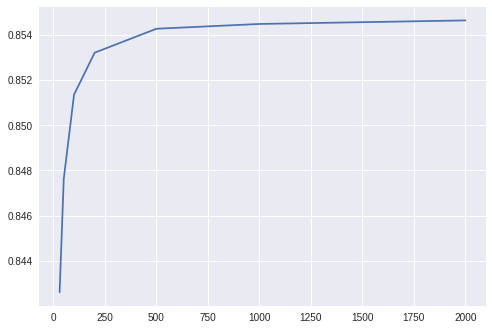

In [ ]:
##Finding the optimal esimator##
results_rf = []
n_estimator_options = [30,50,100,200,500,1000,2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees,oob_score=True,n_jobs=-1,random_state=1)
    model.fit(train_x,train_y)
    print(trees," trees")
    score = model.score(train_x,train_y)
    print(score)
    results_rf.append(score)
    print("")

pd.Series(results_rf,n_estimator_options).plot()
# use 500 trees as after 500 estimator the score flattens

auto  option
0.8542236373108447

None  option
0.8542236373108447

sqrt  option
0.8535584121038942

log2  option
0.8535584121038942

0.9  option
0.8543955388807647

0.2  option
0.8535584121038942



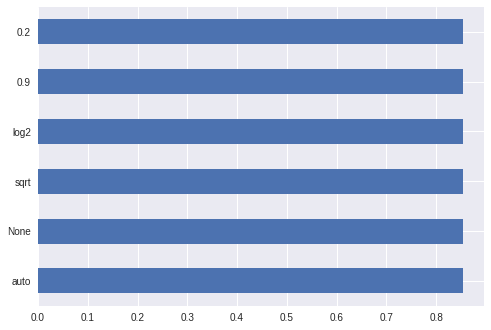

In [ ]:
## finding max number of features parameter tunning##
results_rf = []
max_features_options = ['auto',None,'sqrt','log2',0.9,0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=500,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features=max_features)
    model.fit(train_x,train_y)
    print(max_features," option")
    score = model.score(train_x,train_y)
    print(score)
    results_rf.append(score)
    print("")

pd.Series(results_rf,max_features_options).plot(kind='barh')

# use auto option

In [16]:
##Finding the best regressor model##
rf_regressor = RandomForestRegressor(n_estimators=500,oob_score=True,n_jobs=-1,
                                  random_state=42,max_features='auto')
rf_regressor.fit(train_x,train_y)
rf_regressor.score(train_x,train_y)

0.8542236373108447

In [17]:
rf_regressor.fit(valid_x,valid_y)
rf_regressor.score(valid_x,valid_y)

0.8302387582563964

##Neural Network##

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
##Fitting the NN Model##
airbnb_NN=MLPClassifier(hidden_layer_sizes=2, activation='logistic',solver='lbfgs',random_state=1)
airbnb_NN.fit(train_x,train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [ ]:
confusion_matrix(train_y, airbnb_NN.predict(train_x))

array([[5302,    0,    0, ...,    0,    0,    0],
       [ 129,    0,    0, ...,    0,    0,    0],
       [ 102,    0,    0, ...,    0,    0,    0],
       ...,
       [  74,    0,    0, ...,    0,    0,    0],
       [ 137,    0,    0, ...,    0,    0,    0],
       [ 409,    0,    0, ...,    0,    0,    0]])

In [ ]:
confusion_matrix(valid_y, airbnb_NN.predict(valid_x))

array([[12231,     0,     0, ...,     0,     0,     0],
       [  279,     0,     0, ...,     0,     0,     0],
       [  168,     0,     0, ...,     0,     0,     0],
       ...,
       [  165,     0,     0, ...,     0,     0,     0],
       [  354,     0,     0, ...,     0,     0,     0],
       [  886,     0,     0, ...,     0,     0,     0]])

In [ ]:
y_pred=airbnb_NN.predict(train_x)
print(airbnb_NN.score(train_x, train_y))

0.3614671393509681


In [ ]:
y_pred=airbnb_NN.predict(valid_x)
print(airbnb_NN.score(valid_x, valid_y))

0.3573494609518801


In [ ]:
##RMSE score of the NN Model for validation data##
pred_y = airbnb_NN.predict(valid_x)
print('Root Mean Squared Error(valid):', np.sqrt(metrics.mean_squared_error(valid_y, pred_y)))

Root Mean Squared Error(valid): 174.09280845941106


In [ ]:
##RMSE score of the NN Model for training data##
pred_y = airbnb_NN.predict(train_x)
print('Root Mean Squared Error(train):', np.sqrt(metrics.mean_squared_error(train_y, pred_y)))

Root Mean Squared Error(train): 171.54083293189117


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
param_grid = {'hidden_layer_sizes':[(1),(2),(3),(4),(5),(6),(7),(8),(10)]}

In [ ]:
gridsearch=GridSearchCV(MLPClassifier(activation='logistic',solver='lbfgs',
                                      random_state=1, max_iter=500),
                        param_grid=param_grid,cv=5,n_jobs=-1)
gridsearch.fit(train_x,train_y)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', max_iter=500,
                                     random_state=1, solver='lbfgs'),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 10]})

In [ ]:
gridsearch.best_score_

0.3648078385929243

In [ ]:
gridsearch.best_params_

{'hidden_layer_sizes': 10}

##KNeighborsClassifier##

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)

x_train = scaler.transform(train_x)
x_test = scaler.transform(valid_x)

#fit the model
neigh.fit(x_train, train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicted class
y_pred=neigh.predict(x_test)

In [ ]:
# Calculate the accuracy of the model for test data
print(neigh.score(x_test, valid_y)) 

0.30785637070149297


In [ ]:
print('Root Mean Squared Error (valid):', np.sqrt(metrics.mean_squared_error(valid_y, y_pred)))

Root Mean Squared Error (valid): 144.03491368072815


In [ ]:
y_pred2=neigh.predict(x_train)

In [ ]:
# Calculate the accuracy of the model for train data
print(neigh.score(x_train, train_y)) 

0.5001363512407963


In [ ]:
print('Root Mean Squared Error (train):', np.sqrt(metrics.mean_squared_error(train_y, y_pred2)))

Root Mean Squared Error (train): 126.24680508800108


##Multiple Linear Regression#

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
##Transforming the variables using square root transforamtion for removing outliers and skewness##
data_trf1= airbnb_model['price'].transform([np.sqrt])
airbnb_trf1=data_trf1.rename(columns={'sqrt':'sqrt_price'})
print(airbnb_trf1)

data_trf2= airbnb_model['availability_365'].transform([np.sqrt])
airbnb_trf2=data_trf2.rename(columns={'sqrt':'sqrt_availability_365'})
print(airbnb_trf2)

In [ ]:
airbnb_reg_data = pd.concat([airbnb_model,airbnb_trf1,airbnb_trf2],axis=1)

In [ ]:
airbnb_reg_data.drop(['price', 'availability_365'],axis=1,inplace = True)


In [ ]:
airbnb_reg_data.head()

minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Entire apartment  \
0                                  0                           0   
1                                  0                           1   
2                                  0                           0   
3                                  0                           1   
4                                  0                           1   

   room_type_Private room  ...  \
0                       1  ...   
1                       0  ...   
2                       1  ...   
3                       0  ...   
4                       0  ...   

   calculated_host_listings_count_group_more than two listings  \
0                                                  1             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   calculated_host_listings_count_group_one listing  \
0                                                 0   
1                                                 0   
2                                                 1   
3                                                 1   
4                                                 1   

   calculated_host_listings_count_group_two listings  \
0                                                  0   
1                                                  1   
2                                                  0   
3                                                  0   
4                                                  0   

   minimum_nights_group_five nights or more  minimum_nights_group_four nights  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         1                                 0   

   minimum_nights_group_one night  minimum_nights_group_three nights  \
0                               1                                  0   
1                               1                                  0   
2                               0                                  1   
3                               1                                  0   
4                               0                                  0   

   minimum_nights_group_two nights  sqrt_price  sqrt_availability_365  
0                                0   12.206556              19.104973  
1                                0   15.000000              18.841444

In [ ]:
# split train and validation dataset
x = airbnb_reg_data.drop(['sqrt_availability_365'], axis=1)
y = airbnb_reg_data['sqrt_availability_365'].astype(float)


train_x, valid_x, train_y, valid_y = train_test_split(x,y , test_size=0.7, random_state=1)

In [ ]:
##Fitting the regression model##
linear_model_sm = sm.OLS(train_y,sm.tools.add_constant(train_x).astype(float))
results_sm = linear_model_sm.fit()
print(results_sm.summary())

                              OLS Regression Results                             
Dep. Variable:     sqrt_availability_365   R-squared:                       0.267
Model:                               OLS   Adj. R-squared:                  0.266
Method:                    Least Squares   F-statistic:                     332.7
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           21:43:06   Log-Likelihood:                -47638.
No. Observations:                  14668   AIC:                         9.531e+04
Df Residuals:                      14651   BIC:                         9.544e+04
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
##Regression using SK learn##
linear_model_sk = LinearRegression()  
linear_model_sk.fit(train_x, train_y)
linear_model_sk.score(valid_x, valid_y)


0.26084108787478877

In [ ]:
validpred_y = linear_model_sk.predict(valid_x)
df = pd.DataFrame({'Actual': valid_y, 'Predicted': validpred_y})
print(linear_model_sk.score(valid_x, valid_y)) 

0.26084108787478877


In [ ]:
##RMSE score of the NN Model for validation data##
print('Root Mean Squared Error(valid):', np.sqrt(metrics.mean_squared_error(valid_y, validpred_y)))

Root Mean Squared Error(valid): 6.281613121953267


In [ ]:
trainpred_y = linear_model_sk.predict(train_x)
df = pd.DataFrame({'Actual': train_y, 'Predicted': trainpred_y})
print(linear_model_sk.score(train_x, train_y)) 

0.26651606442789355


In [ ]:
##RMSE score of the NN Model for training data##
print('Root Mean Squared Error(train):', np.sqrt(metrics.mean_squared_error(train_y, trainpred_y)))

Root Mean Squared Error(train): 6.2265086263307134


##Appendix- EDA##

In [ ]:
##Installing Dataprep package
!pip install -U dataprep

In [ ]:
##Importing the Airbnb Dataset
import pandas as pd
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
##Irrevalent Variables('id','name','host_id','host_name') and Redundant Variable ('reviews_per_month') is dropped
airbnb.drop(['id','name','host_id','host_name','reviews_per_month'],axis=1,inplace = True)


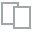
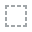
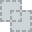
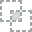
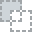
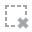
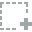
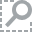
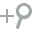
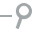
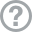
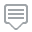
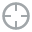
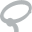
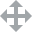
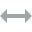
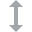
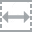
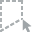
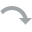
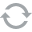
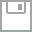
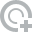
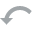
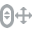
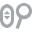
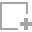
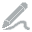
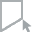
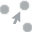
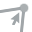
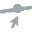

In [ ]:
##Plotting all the variables
from dataprep.eda import plot
plot(airbnb)


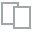
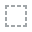
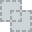
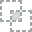
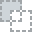
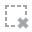
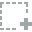
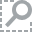
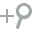
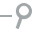
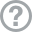
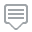
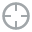
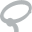
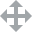
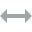
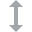
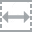
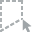
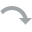
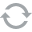
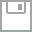
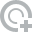
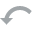
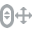
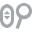
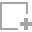
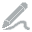
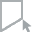
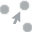
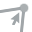
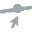

In [ ]:
##Plotting the corelations among all the individual variables
from dataprep.eda import plot_correlation
plot_correlation(airbnb)


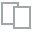
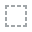
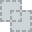
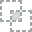
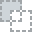
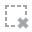
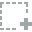
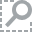
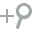
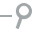
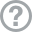
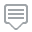
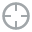
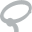
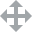
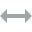
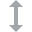
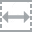
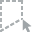
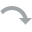
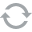
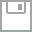
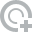
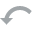
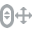
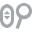
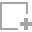
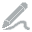
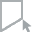
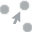
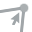
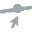

In [ ]:
##Finding the Missing Values
from dataprep.eda import plot_missing
plot_missing(airbnb)

In [ ]:
##Creating the EDA Report for Airbnb Dataset
from dataprep.eda import create_report
eda_report = create_report(airbnb)

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



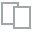
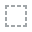
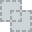
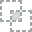
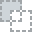
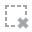
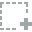
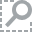
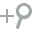
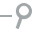
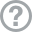
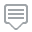
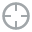
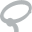
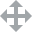
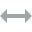
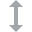
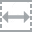
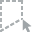
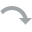
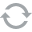
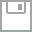
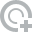
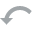
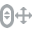
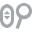
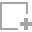
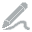
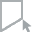
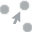
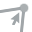
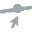

In [ ]:
##Visualizing the EDA Report
eda_report.show()

In [ ]:
##Creating the Web version of the EDA Report
eda_report.save('eda_report_hosain_ahmed_Dataprep')

Report has been saved to eda_report_hosain_ahmed_Dataprep.html!
